## Linear regression model

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv('../Data/datasets/processed/data.csv')
temp = df[['Year','cnt']].groupby('Year').sum().reset_index()
temp['Year'] = temp['Year'].astype(int)

In [3]:
def lr(temp, first, last):
    temp = temp[temp['Year'] >= first]
    temp = temp[temp['Year'] <= last]
    X = temp['Year'].values.reshape(-1, 1) 
    y = temp['cnt'].values.reshape(-1, 1) 
    m = LinearRegression().fit(X, y)
    y_pred = m.predict(X)
    
    # Metrics
    r_sq = m.score(X, y)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {m.intercept_}")
    print(f"slope: {m.coef_}")
    
    plt.figure(figsize=(10,5))
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='green')
    plt.xticks(X)
    plt.xlabel('Year') 
    plt.ylabel('Count') 
    plt.ylim((2e6,6e6))
    plt.title('Year ' + str(first) + ' till ' + str(last))
    plt.show()

coefficient of determination: 0.3219539510677747
intercept: [-1.98693178e+08]
slope: [[100620.7]]


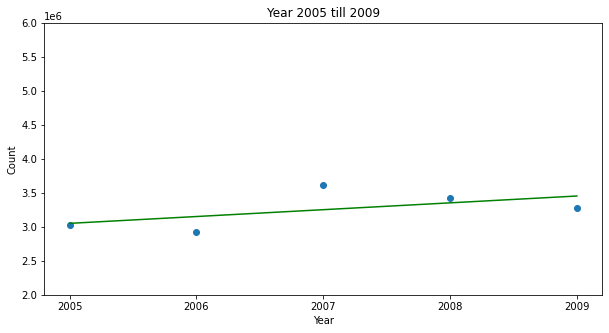

coefficient of determination: 0.9864896702973932
intercept: [-7.50587826e+08]
slope: [[375079.9]]


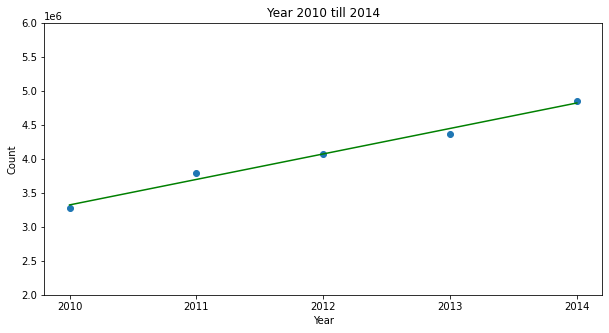

coefficient of determination: 0.0034380092775485593
intercept: [-7537010.30000001]
slope: [[6030.1]]


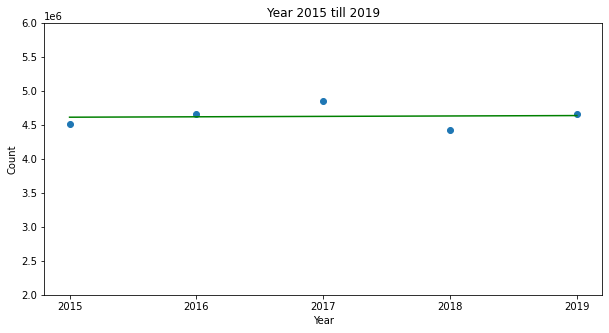

In [4]:
lst1 = [2005, 2010, 2015]
lst2 = [2009, 2014, 2019]
for i in range(3):
    lr(temp, lst1[i], lst2[i])

coefficient of determination: 0.9092578965380311
intercept: [-3.05963477e+08]
slope: [[154034.44210526]]


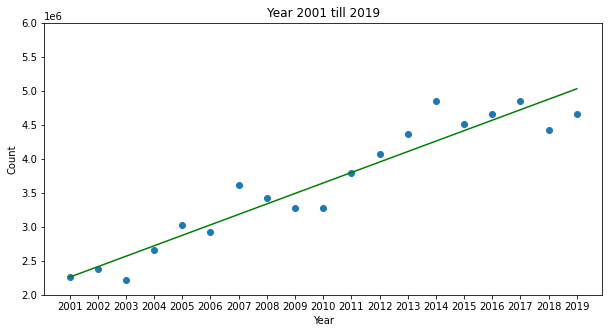

In [5]:
lr(temp, 2001, 2019) #19 years

coefficient of determination: 0.6068277404632296
intercept: [-2.57430746e+08]
slope: [[129947.90909091]]


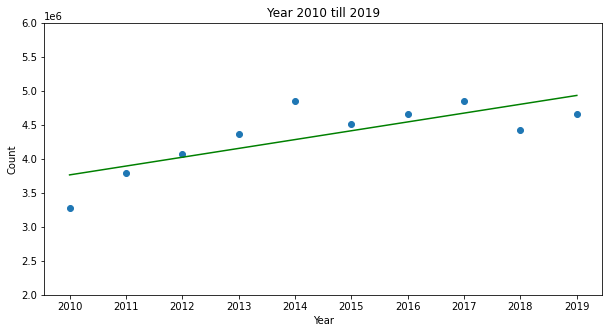

In [6]:
lr(temp, 2010, 2019) #10 years

coefficient of determination: 0.0034380092775485593
intercept: [-7537010.30000001]
slope: [[6030.1]]


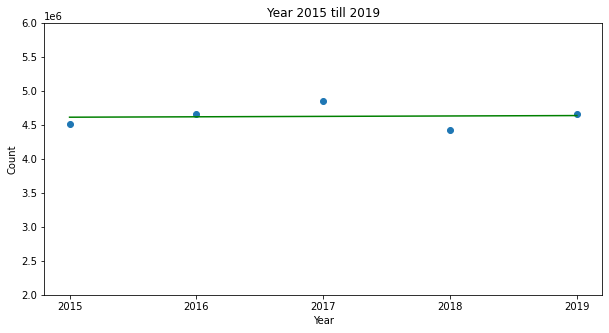

In [7]:
lr(temp, 2015, 2019) # 5 years

## Pareto chart

In [8]:
temp = df[['country','cnt']].groupby('country').sum().reset_index()
temp['cnt'] = temp['cnt'].astype(int)

#sort DataFrame by count descending
temp = temp.sort_values(by='cnt', ascending=False)
temp['cumperc'] = temp['cnt'].cumsum()/temp['cnt'].sum()*100
temp.head(10)

,country,cnt,cumperc
5,Brunei,26479021,37.575338
21,Peninsular Malaysia,16327463,60.744999
24,Sabah,11217470,76.663270
14,Indonesia,8218063,88.325200
22,Philippines,1653614,90.671779
19,Others,1586233,92.922740
25,Singapore,816629,94.081586
7,China,577881,94.901634
31,United Kingdom,432150,95.514881
13,India,413664,96.101896


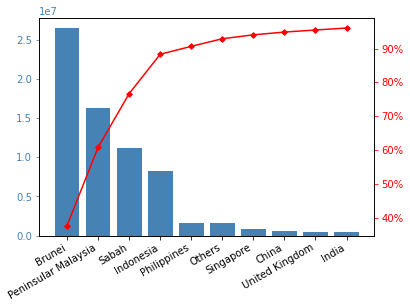

In [9]:
#add column to display cumulative percentage
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4
t = temp.head(10)


#create basic bar plot
fig, ax = plt.subplots()
ax.bar(t.country, t['cnt'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(t.country, t['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

## Visitor arrival and services GDP

In [14]:
df = pd.read_csv('../Data/datasets/processed/data.csv')
temp = df[['Year','cnt']].groupby('Year').sum().reset_index()
temp['Year'] = temp['Year'].astype(int)
temp = temp.set_index('Year')

gdp = pd.read_csv('../Data/datasets/gdp.csv')
gdp = gdp[['Year','Other Service', 'Total (RM million)','Tourism']].set_index('Year')
gdp['Other Service'] = gdp['Other Service'].astype(float)
gdp['Total (RM million)'] = gdp['Total (RM million)'].astype(float)

df4 = gdp.join(temp).reset_index()
df4 = df4[df4['Year'] != 2020]
df4.head(20)

,Year,Other Service,Total (RM million),Tourism,cnt
0,2010,2380.0,25977.0,670.0,3270655.0
1,2011,2543.0,27899.0,610.0,3795373.0
2,2012,2651.0,29641.0,790.0,4069023.0
3,2013,2782.0,31274.0,950.0,4371748.0
4,2014,2880.0,33153.0,1060.0,4857867.0
5,2015,3465.0,38370.0,960.0,4517179.0
6,2016,3617.0,40982.0,840.0,4661100.0
7,2017,3768.0,43542.0,859.0,4856888.0
8,2018,3928.0,46313.0,NaN,4430921.0
9,2019,4103.0,48769.0,NaN,4662419.0


In [15]:
def lr4(df4, colname):
    y = df4[colname].values.reshape(-1, 1) 
    X = df4['cnt'].values.reshape(-1, 1)
    m = LinearRegression().fit(X, y)
    y_pred = m.predict(X)
    
    # Metrics
    r_sq = m.score(X, y)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {m.intercept_}")
    print(f"slope: {m.coef_}")
    
    plt.figure(figsize=(10,5))
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='green')
    plt.xticks(X)
    plt.xlabel('Visitor arrival data') 
    plt.ylabel(colname) 
    plt.title('Visitor arrival data vs ' + str(colname))
    plt.show()

coefficient of determination: 0.5045515932436122
intercept: [-12942.06373408]
slope: [[0.01138893]]


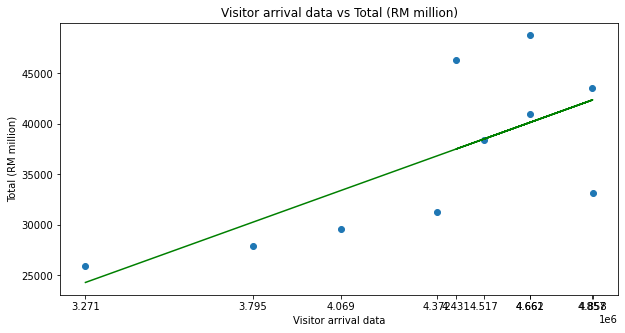

In [16]:
# Total GDP
lr4(df4, 'Total (RM million)')

coefficient of determination: 0.5020738649722156
intercept: [-643.88483023]
slope: [[0.00088648]]


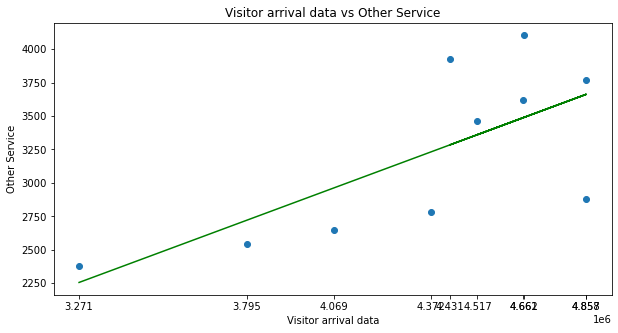

In [17]:
# Services GDP
lr4(df4, 'Other Service')

coefficient of determination: 0.6373346651988472
intercept: [-88.00938244]
slope: [[0.00021637]]


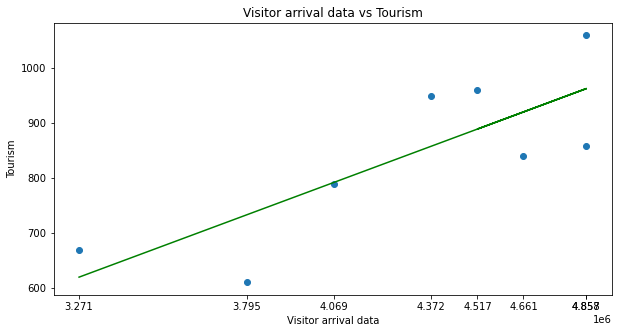

In [19]:
# Services GDP
lr4(df4[df4['Year'] <= 2017], 'Tourism')